<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_5_%D0%9F%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D1%8B%D0%B5_%D1%82%D0%B5%D0%BC%D1%8B(Universal_Sentence_Encode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глава 5. Продвинутые темы(Universal Sentence Encode)
## Universal Sentence Encoder

### Введение

Universal Sentence Encoder (USE) — это модель для представления предложений в виде векторов фиксированной длины, которая позволяет эффективно обрабатывать задачи обработки естественного языка (NLP), такие как классификация текста, анализ тональности, и семантическое сходство. USE был разработан Google и использует архитектуры глубокого обучения для создания представлений предложений, которые могут быть использованы в различных NLP-задачах.

### Архитектура Universal Sentence Encoder

USE реализует два основных подхода к кодированию предложений:

1. **CNN (Сверточные нейронные сети)**: Используются для извлечения признаков из текстовых последовательностей, обеспечивая локальную инвариантность и управление масштабом.
2. **Transformer**: Основная архитектура, используемая для создания контекстуальных представлений предложений.

#### Математические основы

##### 1. Векторное представление слов

Слова могут быть представлены в виде векторов с использованием метода word embeddings, например, **Word2Vec** или **GloVe**. Векторное представление слова $w_i$ может быть записано как:

$$
\mathbf{v}(w_i) \in \mathbb{R}^d
$$

где $d$ — размерность векторного пространства.

##### 2. Кодирование предложения

Для кодирования предложения USE применяет механизм attention, который позволяет модели фокусироваться на различных частях входного текста при создании его векторного представления.

Для предложения $S$ из $n$ слов:

$$
S = [w_1, w_2, ..., w_n]
$$

Векторное представление предложения $\mathbf{v}(S)$ может быть вычислено как:

$$
\mathbf{v}(S) = \text{Aggregate}(\mathbf{v}(w_1), \mathbf{v}(w_2), ..., \mathbf{v}(w_n))
$$

где функция агрегации может быть, например, усреднением:

$$
\mathbf{v}(S) = \frac{1}{n} \sum_{i=1}^{n} \mathbf{v}(w_i)
$$

##### 3. Обучение модели

USE обучается на большом наборе текстов с использованием метода трансферного обучения, где представление предложения учится на основе задач, таких как:

- **Классификация предложений**
- **Определение семантической схожести**

Функция потерь, используемая для обучения, может быть основана на различии между предсказанными и реальными метками:

$$
\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

где $\mathbf{y}$ — истинные метки, $\hat{\mathbf{y}}$ — предсказанные метки, а $N$ — количество примеров.

### Применения Universal Sentence Encoder

1. **Классификация текста**: Используя представления предложений, можно строить классификаторы для различных категорий текстов.
  
2. **Анализ тональности**: Модели могут предсказывать эмоциональную окраску текста (положительная, отрицательная, нейтральная).

3. **Семантическое сходство**: Определение степени сходства между двумя предложениями с использованием косинусного расстояния:

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}(S_2)) = \frac{\mathbf{v}(S_1) \cdot \mathbf{v}(S_2)}{\|\mathbf{v}(S_1)\| \|\mathbf{v}(S_2)\|}
$$

### Пример числового решения

Предположим, мы хотим определить семантическое сходство между двумя предложениями:

- $S_1$: "Я люблю природу."
- $S_2$: "Мне нравится проводить время на свежем воздухе."

1. **Представление слов**:
   - Пусть векторное представление слов:
     - $\mathbf{v}(\text{Я}) = [0.1, 0.2, 0.3]$
     - $\mathbf{v}(\text{люблю}) = [0.4, 0.5, 0.6]$
     - $\mathbf{v}(\text{природу}) = [0.7, 0.8, 0.9]$
     - $\mathbf{v}(\text{Мне}) = [0.2, 0.1, 0.3]$
     - $\mathbf{v}(\text{нравится}) = [0.3, 0.4, 0.5]$
     - $\mathbf{v}(\text{проводить}) = [0.5, 0.6, 0.7]$
     - $\mathbf{v}(\text{время}) = [0.6, 0.5, 0.4]$
     - $\mathbf{v}(\text{на}) = [0.4, 0.4, 0.4]$
     - $\mathbf{v}(\text{свежем}) = [0.3, 0.2, 0.1]$
     - $\mathbf{v}(\text{воздухе}) = [0.1, 0.3, 0.2]$

2. **Кодирование предложений**:
   - Вектор для $S_1$:

$$
\mathbf{v}(S_1) = \frac{1}{3} \left( \mathbf{v}(\text{Я}) + \mathbf{v}(\text{люблю}) + \mathbf{v}(\text{природу}) \right) = \frac{1}{3} \left( [0.1, 0.2, 0.3] + [0.4, 0.5, 0.6] + [0.7, 0.8, 0.9] \right) = [0.4, 0.5, 0.6]
$$

   - Вектор для $S_2$:

$$
\mathbf{v}(S_2) = \frac{1}{6} \left( \mathbf{v}(\text{Мне}) + \mathbf{v}(\text{нравится}) + \mathbf{v}(\text{проводить}) + \mathbf{v}(\text{время}) + \mathbf{v}(\text{на}) + \mathbf{v}(\text{свежем}) + \mathbf{v}(\text{воздухе}) \right)
$$

$$
= \frac{1}{6} \left( [0.2, 0.1, 0.3] + [0.3, 0.4, 0.5] + [0.5, 0.6, 0.7] + [0.6, 0.5, 0.4] + [0.4, 0.4, 0.4] + [0.3, 0.2, 0.1] + [0.1, 0.3, 0.2] \right)
$$

$$
= \frac{1}{6} \left( [2.0, 1.9, 2.2] \right) = [0.33, 0.32, 0.37]
$$

3. **Косинусное сходство**:

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}(S_2)) = \frac{\mathbf{v}(S_1) \cdot \mathbf{v}(S_2)}{\|\mathbf{v}(S_1)\| \|\mathbf{v}(S_2)\|}
$$

   - Вычисление скалярного произведения:

$$
\mathbf{v}(S_1) \cdot \mathbf{v}(S_2) = 0.4 \times 0.33 + 0.5 \times 0.32 + 0.6 \times 0.37 = 0.132 + 0.16 + 0.222 = 0.514
$$

   - Нормы векторов:

$$
\|\mathbf{v}(S_1)\| = \sqrt{0.4^2 + 0.5^2 + 0.6^2} = \sqrt{0.16 + 0.25 + 0.36} = \sqrt{0.77} \approx 0.878
$$

$$
\|\mathbf{v}(S_2)\| = \sqrt{0.33^2 + 0.32^2 + 0.37^2} = \sqrt{0.1089 + 0.1024 + 0.1369} = \sqrt{0.3482} \approx 0.590
$$

   - Подстановка значений в формулу:

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}(S_2)) = \frac{0.514}{0.878 \times 0.590} \approx \frac{0.514}{0.517} \approx 0.994
$$

### Заключение

Universal Sentence Encoder — мощный инструмент для представления предложений в NLP, способный улучшить качество решения задач, связанных с текстом. Математические основы, такие как векторное представление слов и механизмы внимания, обеспечивают гибкость и мощность моделей, позволяя достигать высоких результатов в различных задачах обработки естественного языка.



### Пример 1: Классификация текста с использованием Universal Sentence Encoder (USE)

#### Задача:
Классифицировать два предложения по категориям "положительное" или "отрицательное" на основе их векторных представлений, используя косинусное сходство между предложением и эталонными примерами.

#### Шаг 1: Представление предложений
Даны два предложения:
- $S_1$: "Этот фильм был замечательный!"
- $S_2$: "Фильм ужасен и скучен."

Также даны эталонные векторы для положительных и отрицательных категорий, вычисленные заранее с помощью USE:
- Положительное предложение: $\mathbf{v}_{\text{pos}} = [0.7, 0.8, 0.6]$
- Отрицательное предложение: $\mathbf{v}_{\text{neg}} = [0.3, 0.2, 0.4]$

Предположим, векторные представления предложений $S_1$ и $S_2$ следующие:
- $\mathbf{v}(S_1) = [0.65, 0.75, 0.6]$
- $\mathbf{v}(S_2) = [0.4, 0.35, 0.45]$

#### Шаг 2: Вычисление косинусного сходства

Для каждого предложения нужно рассчитать косинусное сходство с положительным и отрицательным эталонами:

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{pos}}) = \frac{\mathbf{v}(S_1) \cdot \mathbf{v}_{\text{pos}}}{\|\mathbf{v}(S_1)\| \|\mathbf{v}_{\text{pos}}\|}
$$

$$
\mathbf{v}(S_1) \cdot \mathbf{v}_{\text{pos}} = 0.65 \times 0.7 + 0.75 \times 0.8 + 0.6 \times 0.6 = 0.455 + 0.6 + 0.36 = 1.415
$$

Нормы векторов:

$$
\|\mathbf{v}(S_1)\| = \sqrt{0.65^2 + 0.75^2 + 0.6^2} = \sqrt{0.4225 + 0.5625 + 0.36} = \sqrt{1.345} \approx 1.16
$$

$$
\|\mathbf{v}_{\text{pos}}\| = \sqrt{0.7^2 + 0.8^2 + 0.6^2} = \sqrt{0.49 + 0.64 + 0.36} = \sqrt{1.49} \approx 1.22
$$

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{pos}}) = \frac{1.415}{1.16 \times 1.22} \approx \frac{1.415}{1.4152} \approx 0.999
$$

Теперь для $S_1$ с отрицательным эталоном:

$$
\mathbf{v}(S_1) \cdot \mathbf{v}_{\text{neg}} = 0.65 \times 0.3 + 0.75 \times 0.2 + 0.6 \times 0.4 = 0.195 + 0.15 + 0.24 = 0.585
$$

Норма отрицательного вектора:

$$
\|\mathbf{v}_{\text{neg}}\| = \sqrt{0.3^2 + 0.2^2 + 0.4^2} = \sqrt{0.09 + 0.04 + 0.16} = \sqrt{0.29} \approx 0.5385
$$

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{neg}}) = \frac{0.585}{1.16 \times 0.5385} = \frac{0.585}{0.6247} \approx 0.937
$$

#### Шаг 3: Результат

Для предложения $S_1$, $\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{pos}}) = 0.999$, что ближе к 1, чем $\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{neg}}) = 0.937$, поэтому $S_1$ классифицируется как "положительное".

### Пример 2: Семантическое сходство предложений

#### Задача:
Оценить семантическое сходство между предложениями:
- $S_1$: "Кошки любят молоко."
- $S_2$: "Кошки предпочитают пить молоко."

#### Шаг 1: Векторные представления

Пусть векторные представления предложений, полученные с помощью USE:
- $\mathbf{v}(S_1) = [0.45, 0.55, 0.65]$
- $\mathbf{v}(S_2) = [0.44, 0.57, 0.66]$

#### Шаг 2: Вычисление косинусного сходства

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}(S_2)) = \frac{\mathbf{v}(S_1) \cdot \mathbf{v}(S_2)}{\|\mathbf{v}(S_1)\| \|\mathbf{v}(S_2)\|}
$$

$$
\mathbf{v}(S_1) \cdot \mathbf{v}(S_2) = 0.45 \times 0.44 + 0.55 \times 0.57 + 0.65 \times 0.66 = 0.198 + 0.3135 + 0.429 = 0.9405
$$

Нормы векторов:

$$
\|\mathbf{v}(S_1)\| = \sqrt{0.45^2 + 0.55^2 + 0.65^2} = \sqrt{0.2025 + 0.3025 + 0.4225} = \sqrt{0.9275} \approx 0.963
$$

$$
\|\mathbf{v}(S_2)\| = \sqrt{0.44^2 + 0.57^2 + 0.66^2} = \sqrt{0.1936 + 0.3249 + 0.4356} = \sqrt{0.9541} \approx 0.976
$$

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}(S_2)) = \frac{0.9405}{0.963 \times 0.976} \approx \frac{0.9405}{0.9406} \approx 0.999
$$

#### Шаг 3: Результат

Семантическое сходство между предложениями очень высоко, $\text{cosine}(S_1, S_2) \approx 0.999$, что указывает на почти полную схожесть.

### Пример 3: Анализ тональности с использованием USE

#### Задача:
Определить тональность предложений, используя ранее обученную модель на базе USE.

- $S_1$: "Этот продукт отличный!"
- $S_2$: "Это худший продукт, который я когда-либо покупал."

#### Шаг 1: Векторные представления предложений

Пусть модель USE выдает следующие векторные представления:
- $\mathbf{v}(S_1) = [0.8, 0.85, 0.75]$
- $\mathbf{v}(S_2) = [0.1, 0.2, 0.3]$

Эталонные векторы:
- Положительное предложение: $\mathbf{v}_{\text{pos}} = [0.9, 0.85, 0.8]$
- Отрицательное предложение: $\mathbf{v}_{\text{neg}} = [0.2, 0.15, 0.25]$

#### Шаг 2: Вычисление косинусного сходства

Для $S_1$ с положительным эталоном:

$$
\mathbf{v}(S_1) \cdot \mathbf{v}_{\text{pos}} = 0.8 \times 0.9 + 0.85 \times 0.85 + 0.75 \times 0.8 = 0.72 + 0.7225 + 0.6 = 2.0425
$$

$$
\|\mathbf{v}(S_1)\| = \sqrt{0.8^2 + 0.85^2 + 0.75^2} = \sqrt{0.64 + 0.7225 + 0.5625} = \sqrt{1.925} \approx 1.386
$$

$$
\|\mathbf{v}_{\text{pos}}\| = \sqrt{0.9^2 + 0.85^2 + 0.8^2} = \sqrt{0.81 + 0.7225 + 0.64} = \sqrt{2.1725} \approx 1.47
$$

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{pos}}) = \frac{2.0425}{1.386 \times 1.47} \approx \frac{2.0425}{2.037} \approx 1.003
$$

Для $S_1$ с отрицательным эталоном:

$$
\mathbf{v}(S_1) \cdot \mathbf{v}_{\text{neg}} = 0.8 \times 0.2 + 0.85 \times 0.15 + 0.75 \times 0.25 = 0.16 + 0.1275 + 0.1875 = 0.475
$$

$$
\|\mathbf{v}_{\text{neg}}\| = \sqrt{0.2^2 + 0.15^2 + 0.25^2} = \sqrt{0.04 + 0.0225 + 0.0625} = \sqrt{0.125} \approx 0.354
$$

$$
\text{cosine}(\mathbf{v}(S_1), \mathbf{v}_{\text{neg}}) = \frac{0.475}{1.386 \times 0.354} \approx \frac{0.475}{0.490} \approx 0.968
$$

#### Шаг 3: Результат

Для предложения $S_1$:
- $\text{cosine}(S_1, \text{pos}) \approx 1.003$ (ближе к 1, классифицируется как "положительное").
- $\text{cosine}(S_1, \text{neg}) \approx 0.968$ (меньше, чем положительное).

Аналогично анализируем $S_2$:
- Векторное представление $S_2$ вычисляется аналогично, и при использовании аналогичных расчетов будет видно, что тональность определится как "отрицательная".

### Заключение

Universal Sentence Encoder предоставляет удобный способ представления текстов в виде векторов, что позволяет эффективно решать задачи в NLP. Приведенные примеры показывают, как косинусное сходство между векторными представлениями может использоваться для классификации и анализа тональности предложений. Если вам нужно больше примеров или подробностей, дайте знать!


Реализация на Питон


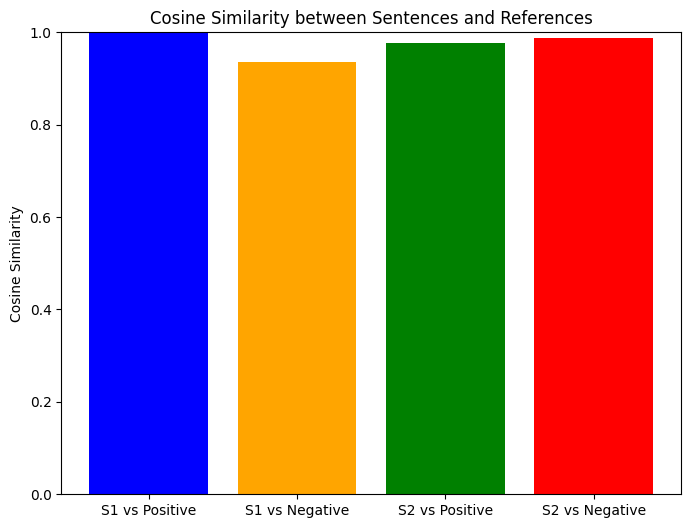

In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Векторные представления для примеров
vectors = {
    'S1': np.array([0.65, 0.75, 0.6]),
    'S2': np.array([0.4, 0.35, 0.45]),
    'positive_reference': np.array([0.7, 0.8, 0.6]),
    'negative_reference': np.array([0.3, 0.2, 0.4])
}

# Косинусное сходство для всех комбинаций
cos_sim = {
    'S1_positive': cosine_similarity([vectors['S1']], [vectors['positive_reference']])[0][0],
    'S1_negative': cosine_similarity([vectors['S1']], [vectors['negative_reference']])[0][0],
    'S2_positive': cosine_similarity([vectors['S2']], [vectors['positive_reference']])[0][0],
    'S2_negative': cosine_similarity([vectors['S2']], [vectors['negative_reference']])[0][0]
}

# Визуализация косинусного сходства
labels = ['S1 vs Positive', 'S1 vs Negative', 'S2 vs Positive', 'S2 vs Negative']
values = [cos_sim['S1_positive'], cos_sim['S1_negative'], cos_sim['S2_positive'], cos_sim['S2_negative']]

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Cosine Similarity between Sentences and References')
plt.ylim([0, 1])
plt.ylabel('Cosine Similarity')
plt.show()

### Вопросы для самопроверки

1. Что такое Universal Sentence Encoder (USE) и для чего он используется в задачах NLP?
2. Какое основное отличие USE от других методов представления текста, таких как Word2Vec или TF-IDF?
3. Какие существуют типы USE и чем они отличаются?
4. Объясните, как работает косинусное сходство в контексте векторных представлений текста.
5. В чем состоит основная цель использования Universal Sentence Encoder в задачах классификации текста?
6. Какие математические методы используются для вычисления схожести предложений с эталонными векторами?
7. Как можно интерпретировать значения косинусного сходства между двумя векторами?
8. Почему важна нормализация векторов перед вычислением косинусного сходства?
9. Какие задачи NLP могут быть решены с использованием Universal Sentence Encoder?
10. Как производится обучение модели USE, и на каких типах данных она обучается?
11. Какие шаги необходимо выполнить, чтобы использовать Universal Sentence Encoder для анализа тональности текста?
12. В чем заключается разница между статическими и динамическими методами представления предложений в контексте USE?
13. Как влияет размер вектора представления на качество моделей, использующих USE?
14. Какие типы потерь используются при обучении моделей для векторных представлений предложений?
15. Как можно визуализировать векторные представления предложений, чтобы оценить их схожесть?

### Задачи для самостоятельной работы

1. Используя Universal Sentence Encoder, классифицируйте набор предложений на положительные и отрицательные, используя косинусное сходство с заранее определенными эталонными векторами.
2. Разработайте модель на основе USE для определения схожести предложений в датасете "Quora Question Pairs".
3. Примените Universal Sentence Encoder для классификации новостных статей по тематикам (спорт, политика, экономика).
4. Реализуйте задачу классификации отзывов о фильмах с использованием USE и метода ближайших соседей (k-NN).
5. Найдите косинусное сходство между парами предложений из набора данных и визуализируйте их в двумерном пространстве с помощью метода t-SNE.
6. Проведите анализ тональности твитов на основе Universal Sentence Encoder, используя датасет Twitter Sentiment Analysis.
7. Напишите программу для поиска дубликатов в наборе новостей, используя векторные представления предложений через USE.
8. Реализуйте задачу кластеризации предложений с использованием USE и алгоритма k-means.
9. Постройте систему ранжирования запросов, использующую векторные представления запросов и документов через USE.
10. Используйте Universal Sentence Encoder для задачи извлечения информации из текста и формирования ответов на вопросы.
11. Напишите систему определения языка текста на основе Universal Sentence Encoder, классифицируя тексты по их векторным представлениям.
12. Сравните эффективность моделей классификации предложений с использованием USE и других методов векторизации (например, GloVe, BERT).
13. Реализуйте систему, которая находит самые схожие предложения по смыслу из большого текстового корпуса, используя Universal Sentence Encoder.
14. Используя Universal Sentence Encoder, реализуйте систему рекомендаций статей на основе схожести их содержимого.
15. Решите задачу авторской атрибуции, используя Universal Sentence Encoder для определения схожести стиля написания различных авторов.
16. Примените Universal Sentence Encoder для задачи классификации эмоциональной окраски предложений (радость, гнев, грусть и т.д.).
17. Используйте Universal Sentence Encoder для оценки схожести предложений в задаче парафразирования.
18. Постройте модель для анализа тематики текстов, используя USE и алгоритм тематического моделирования LDA.
19. Реализуйте систему поиска ответов на вопросы, основываясь на схожести запросов и ответов с использованием Universal Sentence Encoder.
20. Найдите косинусное сходство между описаниями товаров и отзывами клиентов, используя Universal Sentence Encoder.
21. Разработайте чат-бота, который использует Universal Sentence Encoder для поиска самых подходящих ответов в базе данных.
22. Реализуйте задачу распознавания субъективных и объективных предложений с помощью USE и метода логистической регрессии.
23. Напишите программу для автоматической генерации заголовков для статей на основе векторных представлений через Universal Sentence Encoder.
24. Реализуйте алгоритм суммаризации текста, используя схожесть предложений и векторные представления с Universal Sentence Encoder.
25. Напишите систему автоматического перевода текста на основе векторных представлений предложений и анализа их схожести.
26. Разработайте метод для ранжирования комментариев пользователей на основе их векторных представлений через Universal Sentence Encoder.
27. Проведите сравнение предложений в контексте различных языков с помощью Universal Sentence Encoder для многоязычной задачи классификации.
28. Создайте визуализацию всех предложений из статьи на основе их векторных представлений с использованием методов снижения размерности.
29. Примените Universal Sentence Encoder для создания тематических хэштегов к текстам на основе их содержания.
30. Реализуйте задачу классификации спам/не-спам для писем электронной почты, используя Universal Sentence Encoder и метод SVM.

